In [17]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import metastability as mfn
import LCE as lfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/Data2process/Project/' 
F10t2 = '/Volumes/Dominic 10tb2/Data2process/Project/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [64]:
bln_list = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*BLN*metastates.npy')
p20_list = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*PTZ20*metastates.npy')
data_list = bln_list, p20_list
data_list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_metastates.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_metastates.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_metastates.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_metastates.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_metastates.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_metastates.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6d

# Calculate metastablility statistics

In [ ]:
from sklearn.cluster import AffinityPropagation
import copy

data_list = bln_blist, foc_blist, gen_blist
for e in range(len(data_list)):
  for i in range(len(data_list[e])):
    data = np.load(data_list[e][i])[:,1:4913].T
    name = data_list[e][i]

    #Empirical data
    all_clust, sub_clust = mfn.affprop(data) #cluster with affinity prop on empirical data
    emp_sim = mfn.Sim_loop(data, all_clust, sub_clust) #calculate similarity between clustered states

    #Generate null data
    rpks = np.zeros((data.shape))
    for t in range(data.shape[0]):
        temp_pks = data[t]
        np.random.shuffle(temp_pks) 
        rpks[t] = temp_pks

    null_all_clust, null_sub_clust = mfn.affprop(rpks) #cluster with affinity prop on null data
    null_sim = mfn.Sim_loop(rpks, null_all_clust, null_sub_clust) #calculate similarity between clustered states
    n_states = len(emp_sim > np.max(null_sim))
    if len(emp_sim) > n_states:
      print('null model removed a cluster')

    fin_clust = sub_clust[emp_sim > max(null_sim)] #Find the clusters that occur above chance
    p_state, m_dwell, v_dwell = mfn.state_stats(fin_clust, all_clust) #Calculate state transition statistics
    null_m_dwell = mfn.null_states(fin_clust, data) #Calculate the mean dwell time with random dynamics
    np.save(d_path +  name[:name.find('run')+6] + '_' +'metastates.npy', [n_states, p_state, m_dwell, null_m_dwell, v_dwell]) 

  print('Done' + str(e))

In [65]:
# Dataset 4 returns 1 cluster - remove
data_list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_metastates.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_metastates.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_metastates.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_metastates.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_metastates.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_metastates.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_metastates.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6d

In [66]:
#Load data
from matplotlib import cm


plot_list = list(range(len(data_list[0])*2))
count=0
for i,_ in enumerate(data_list):
    for e,_ in enumerate(data_list[i]):

        plot_list[count] = np.load(data_list[i][e], allow_pickle=True)[0]
        count+=1

cond = ['BLN', 'PTZ20']
num = np.arange(0, len(data_list[0]))
cond_data = adfn.cond_list(data_list, cond, 'dataset')
num_data = adfn.cond_list(data_list, num, 'datapoint')
mean_colours = ['k', 'firebrick']
colours  = cm.Spectral_r(np.linspace(0,1,len(data_list[0])))
m_df = pd.DataFrame( {'States':   plot_list, 'condition': cond_data, 'subject': num_data } )
m_df


,States,condition,subject
0,44,BLN,0
1,25,BLN,1
2,14,BLN,2
3,20,BLN,3
4,14,BLN,4
5,17,BLN,5
6,13,BLN,6
7,15,BLN,7
8,26,BLN,8
9,28,PTZ20,0


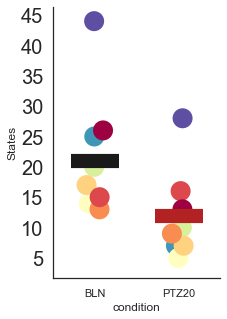

In [67]:
adfn.bar_scatter_plot(m_df, 'States', (3, 5), 7, 20, mean_colours, colours)

In [68]:
bln = m_df[m_df['condition'] == 'BLN']['States']
p20 = m_df[m_df['condition'] == 'PTZ20']['States']
m_list = bln, p20
for i in range(len(m_list)):
    adfn.mean_std(cond[i], m_list[i])

BLN mean = 20.88888888888889  , std = 3.3017017684674723
PTZ20 mean = 11.88888888888889  , std = 2.312072449631646


In [69]:
adfn.stats_2samp(bln, p20, 0.05, 1, 'rel')

At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 1.0   p = 0.0078125


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [77]:
#Load dwell times
data_type = 2 #dwell time per state
dwellt_list, null_dwellt_list = list(range(len(data_list))),list(range(len(data_list)))
for i in range(len(data_list)):
    dwellt, null_dwellt = np.zeros(len(data_list[i])),np.zeros(len(data_list[i]))
    for e in range(len(dwellt)):
        dwellt[e] = np.mean(np.load(data_list[i][e], allow_pickle=True)[data_type])
        null_dwellt[e] = np.load(data_list[i][e], allow_pickle=True)[data_type + 1]
        dwellt_list[i] = dwellt
        null_dwellt_list[i] = null_dwellt

In [79]:
#Compare dwell times against null models

full_list = dwellt_list, null_dwellt_list
import pandas as pd

dt = list(range(36))
cond = list(range(36))
null = list(range(36))

cond_list = ['BLN', 'GEN']
null_list = ['emp', 'null']
count=0

for o in range(len(full_list)):
    for i in range(len(full_list[o])):
        for x in range(len(full_list[o][i])):
            dt[count] = full_list[o][i][x]
            cond[count] = cond_list[i]
            null[count] = null_list[o]
            count+=1
dt_df = pd.DataFrame({"dwell time":(1/2.73)*np.array(dt) , "condition": cond, "null": null})

In [80]:
dt_df

,dwell time,condition,null
0,0.408026,BLN,emp
1,0.392606,BLN,emp
2,0.413817,BLN,emp
3,0.389431,BLN,emp
4,0.416042,BLN,emp
5,0.394382,BLN,emp
6,0.409274,BLN,emp
7,0.404045,BLN,emp
8,0.386885,BLN,emp
9,0.412483,GEN,emp


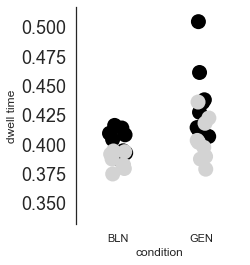

In [82]:
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors2 = ['black','firebrick']
colors1 = ['black', 'lightgrey']
fig, ax = plt.subplots(figsize = (3,4))
#ax = sns.pointplot(x="condition", y="dwell time", data = dt_df, hue = 'condition', palette = colors2, join=True, ci=0, scale=6, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y="dwell time", data = dt_df, hue = 'null', palette = colors1, size = 15, jitter = True ,alpha = 1)

ax.legend_.remove()
plt.yticks(size = 18)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

In [113]:
bln_dt = dt_df[(dt_df['condition'] == 'BLN') & (dt_df['null'] == 'emp')]     ['dwell time']
p20_dt = dt_df[(dt_df['condition'] == 'GEN') & (dt_df['null'] == 'emp')]['dwell time']
bln_null = dt_df[(dt_df['condition'] == 'BLN') & (dt_df['null'] == 'null')]['dwell time']
p20_null = dt_df[(dt_df['condition'] == 'GEN') & (dt_df['null'] == 'null')]['dwell time']

#Calculate residual dwell times given nulls
bln_change = np.array(bln_dt)  - np.array(bln_null) 
p20_change = np.array(p20_dt)  - np.array(p20_null) 

In [114]:
m_list = bln_dt, p20_dt
cond = ['BLN empirical', 'PTZ20 empirical']
for i in range(len(m_list)):
    adfn.mean_std(cond[i], m_list[i])
    
m_list = bln_null, p20_null
cond = ['BLN null', 'PTZ20 null']
for i in range(len(m_list)):
    adfn.mean_std(cond[i], m_list[i])

BLN empirical mean = 0.40161205112439674  , std = 0.0036544700892891563
PTZ20 empirical mean = 0.43459390066252784  , std = 0.01046209731764914
BLN null mean = 0.3864504591631489  , std = 0.002405662423012923
PTZ20 null mean = 0.4037804061773395  , std = 0.006154166929252833


In [102]:
#Compare null vs empirical

adfn.stats_2samp(bln_dt, bln_null, 0.05, 1, 'rel')

adfn.stats_2samp(p20_dt, p20_null, 0.05, 1, 'rel')

At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 0.0   p = 0.00390625
At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 0.0   p = 0.00390625


In [115]:
#Compare BLN vs P20
adfn.stats_2samp(p20_dt, bln_dt, 0.05, 1, 'rel')

At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 1.0   p = 0.0078125


In [107]:
adfn.comb_list([bln_change, p20_change])

[0.033412309279089336,
 0.010919811414592362,
 0.020190778657452002,
 0.007015362650283408,
 0.022673232463955417,
 0.007026443414851258,
 0.015043655283483559,
 0.012559515663950749,
 0.007613218823572965,
 0.03376909707713144,
 0.03882141115953036,
 0.014202202911056283,
 0.02561693517066338,
 0.06856262934331697,
 0.020039767215938198,
 0.032337488866319486,
 0.01927136484794978,
 0.024700553774788803]

In [109]:
#Plot residual dwell times
from matplotlib import cm

data_list = bln_change, p20_change
plot_list = adfn.comb_list(data_list)
cond = ['BLN', 'PTZ20']
num = np.arange(0, len(data_list[0]))
cond_data = adfn.cond_list(data_list, cond, 'dataset')
num_data = adfn.cond_list(data_list, num, 'datapoint')
mean_colours = ['k', 'firebrick']
colours  = cm.Spectral_r(np.linspace(0,1,len(data_list[0])))
m_df = pd.DataFrame( {'Residual dwell time':   plot_list, 'condition': cond_data, 'subject': num_data } )
m_df


,Residual dwell time,condition,subject
0,0.033412,BLN,0
1,0.010920,BLN,1
2,0.020191,BLN,2
3,0.007015,BLN,3
4,0.022673,BLN,4
5,0.007026,BLN,5
6,0.015044,BLN,6
7,0.012560,BLN,7
8,0.007613,BLN,8
9,0.033769,PTZ20,0


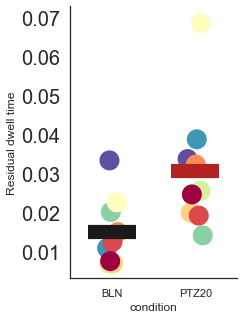

In [110]:
adfn.bar_scatter_plot(m_df, 'Residual dwell time', (3, 5), 7, 20, mean_colours, colours)

In [111]:
bln = m_df[m_df['condition'] == 'BLN']['Residual dwell time']
p20 = m_df[m_df['condition'] == 'PTZ20']['Residual dwell time']
m_list = bln, p20
for i in range(len(m_list)):
    adfn.mean_std(cond[i], m_list[i])

BLN mean = 0.015161591961247896  , std = 0.002955933739696265
PTZ20 mean = 0.0308134944851883  , std = 0.0053874639648055994


In [112]:
adfn.stats_2samp(bln, p20, 0.05, 1, 'rel')

At least one sample is non-Gaussian - performing non-parametric test
Samples are significantly different
w = 2.0   p = 0.01171875


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))
